In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as pl
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
sns.set()

In [5]:
raw_data = pd.read_csv('..\Data\Time Series Analysis in Python\Section 3\S_3_L_11\Index2018.csv')
df = raw_data.copy()

In [6]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [7]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


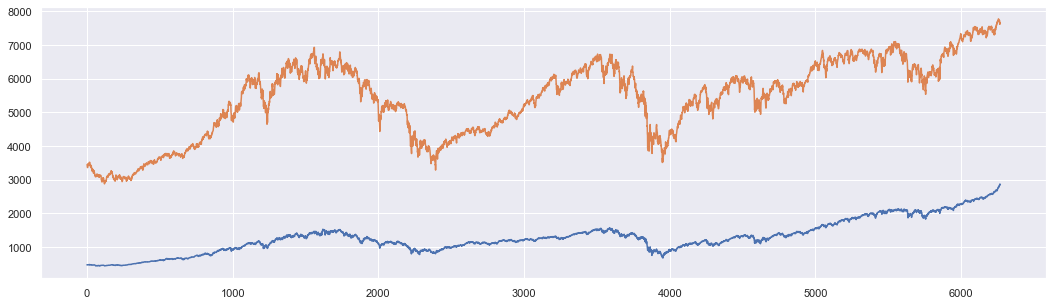

In [8]:
df.spx.plot(figsize=(18,5))
df.ftse.plot(figsize=(18,5))
plt.show()

#### QQ PLot

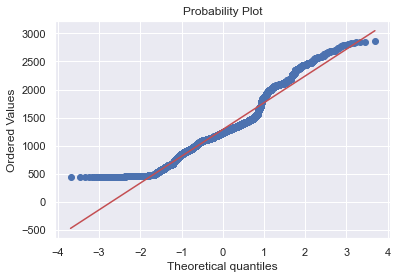

In [9]:
# In this case the data is not normally distributed
stats.probplot(df.spx, dist="norm", plot=pl)
pl.show()

In [10]:
df.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [11]:
df.date = pd.to_datetime(df.date, format='%d/%m/%Y')

In [12]:
df.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [13]:
df.set_index('date', inplace=True)

In [14]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
 df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [16]:
df = df.asfreq('B')

In [17]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
df.spx.fillna(method='ffill', inplace=True)
df.dax.fillna(value=df.dax.mean(), inplace=True)
df.ftse.fillna(method='bfill', inplace=True)

In [19]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [20]:
df['Market_Value'] = df.spx
df.Market_Value

date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2018-01-23    2839.130362
2018-01-24    2837.544008
2018-01-25    2839.253031
2018-01-26    2872.867839
2018-01-29    2853.528411
Freq: B, Name: Market_Value, Length: 6277, dtype: float64

In [21]:
size = int(len(df.Market_Value) * 0.8)

In [22]:
data = pd.DataFrame(df.Market_Value.iloc[:size])
data_test = pd.DataFrame(df.Market_Value.iloc[size:])

In [23]:
data

,Market_Value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


#### White Noise

In [24]:
wn = np.random.normal(data.mean(), data.std(), size=len(data))

In [25]:
data['wn'] = wn

In [26]:
data.describe()

,Market_Value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.966405
std,292.559287,291.333860
min,438.920000,106.053731
25%,914.620000,895.510279
50%,1144.650000,1091.854553
75%,1316.280729,1281.750975
max,1570.252238,2302.584894


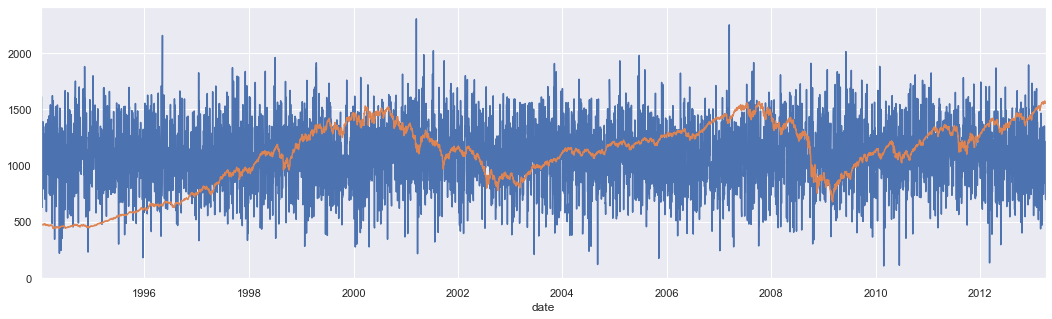

In [27]:
data.wn.plot(figsize=(18,5))
data.Market_Value.plot(figsize=(18,5))
plt.show()

In [28]:
rw = pd.read_csv('..\Data\Time Series Analysis in Python\RandWalk.csv')
rw.date = pd.to_datetime(rw.date, format='%d/%m/%Y')
rw.set_index('date', inplace=True)
rw = rw.asfreq('B')
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [29]:
data['rw'] = rw.price

In [30]:
data

,Market_Value,wn,rw
date,,,
1994-01-07,469.900000,1209.215609,1122.139662
1994-01-10,475.270000,1611.048281,1080.347860
1994-01-11,474.130000,1118.150575,1082.095245
1994-01-12,474.170000,1234.652011,1083.639265
1994-01-13,472.470000,999.085906,1067.146255
...,...,...,...
2013-04-01,1562.173837,1150.647186,2263.675474
2013-04-02,1570.252238,884.268673,2225.000870
2013-04-03,1553.686978,1211.113150,2190.787688


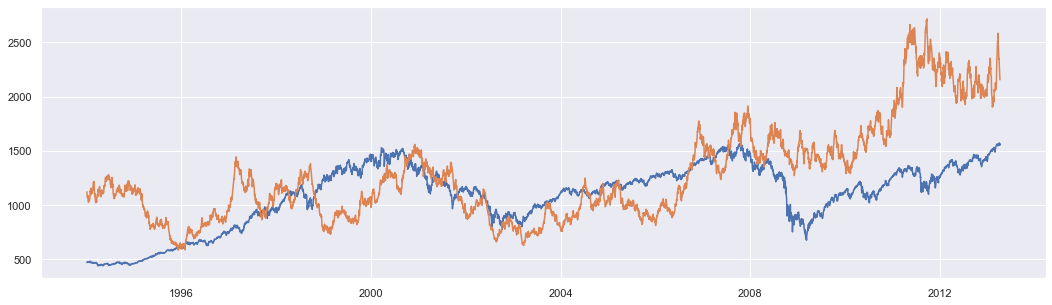

In [31]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(data.index, data.Market_Value, label='Market Value')
ax.plot(data.index, data.rw, label='wn');

#### Stationarity

In [32]:
sts.adfuller(data.Market_Value)

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [33]:
sts.adfuller(data.wn)

(-70.31804012494094,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70778.54268087356)

#### Seasonality

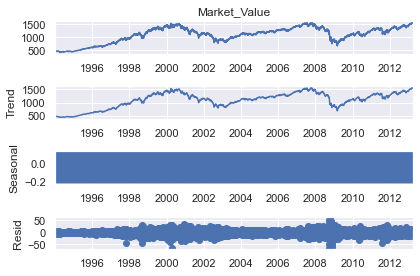

In [34]:
s_dec_add = seasonal_decompose(data.Market_Value, model='additive')
s_dec_add.plot()
plt.show()

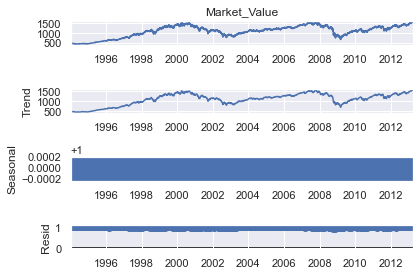

In [35]:
s_dec_mul = seasonal_decompose(data.Market_Value, model='multiplicative')
s_dec_mul.plot()
plt.show()

#### Autcorrelation ACF

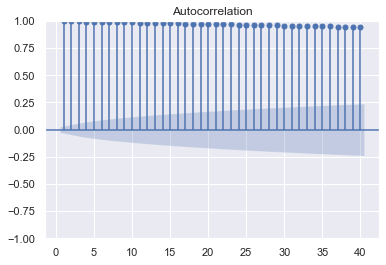

In [36]:
sgt.plot_acf(data.Market_Value, lags=40, zero=False)
plt.show()

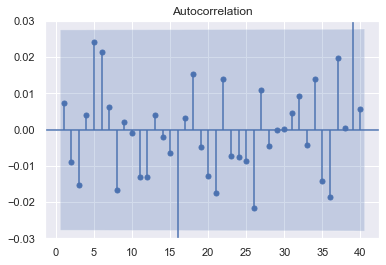

In [37]:
sgt.plot_acf(data.wn, lags=40, zero=False)
plt.ylim(-0.03, 0.03)
plt.show()

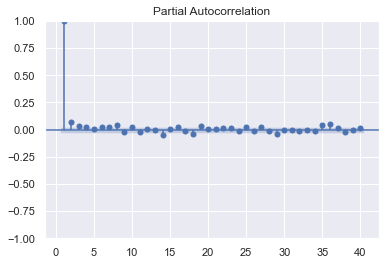

In [38]:
sgt.plot_pacf(data.Market_Value, lags=40, zero=False, method='ols')
plt.show()

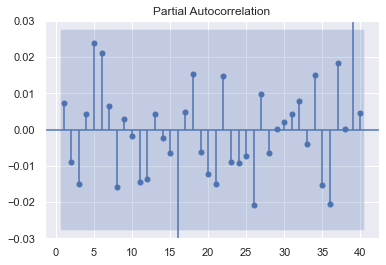

In [39]:
sgt.plot_pacf(data.wn, lags=40, zero=False, method='ols')
plt.ylim(-0.03, 0.03)
plt.show()

In [40]:
model_ar = ARIMA(data.Market_Value, order=(1,0,0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -20097.439
Date:                Mon, 15 Aug 2022   AIC                          40200.879
Time:                        18:50:54   BIC                          40220.443
Sample:                    01-07-1994   HQIC                         40207.734
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6133    165.184      6.608      0.000     767.858    1415.369
ar.L1          0.9992      0.001   1695.377      0.000       0.998       1.000
sigma2       175.2480      1.771     98.978      0.000     171.778     178.718
===================================================================================
Ljung-Box (L1) (Q):                  24.60   Jarque-Bera (JB):              7473.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
model_ar_2 = ARIMA(data.Market_Value, order=(2,0,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -20085.289
Date:                Mon, 15 Aug 2022   AIC                          40178.578
Time:                        18:50:56   BIC                          40204.664
Sample:                    01-07-1994   HQIC                         40187.719
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6076    223.343      4.888      0.000     653.863    1529.352
ar.L1          0.9300      0.009     99.031      0.000       0.912       0.948
ar.L2          0.0694      0.009      7.405      0.000       0.051       0.088
sigma2       174.3966      1.768     98.654      0.000     170.932     177.861
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7475.27
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model_ar_3 = ARIMA(data.Market_Value, order=(3,0,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -20083.003
Date:                Mon, 15 Aug 2022   AIC                          40176.005
Time:                        18:50:56   BIC                          40208.612
Sample:                    01-07-1994   HQIC                         40187.431
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    119.496      9.135      0.000     857.444    1325.860
ar.L1          0.9271      0.009     97.886      0.000       0.909       0.946
ar.L2          0.0376      0.012      3.227      0.001       0.015       0.060
ar.L3          0.0342      0.008      4.437      0.000       0.019       0.049
sigma2       174.1643      1.799     96.828      0.000     170.639     177.690
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7224.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### LLR test

In [43]:
# LLR funntion
def llr(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = abs(2 * (L1 - L2))
    p = stats.chi2.sf(LR, DF).round(3)
    return p

In [44]:
llr(model_ar_2, model_ar_3, DF=5)

0.47

In [45]:
data['returns_spx'] = data.Market_Value.pct_change(1).multiply(100)

In [46]:
sts.adfuller(data.returns_spx[1:])

(-17.034457190981186,
 8.280537020316944e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

In [47]:
model_ret_ar = ARIMA(data.returns_spx[1:], order=(1,0,0))
result_ret_ar = model_ret_ar.fit()
result_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8067.541
Date:                Mon, 15 Aug 2022   AIC                          16141.081
Time:                        18:50:59   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.915      0.055      -0.001       0.063
ar.L1         -0.0719      0.008     -8.514      0.000      -0.088      -0.055
sigma2         1.4568      0.013    114.005      0.000       1.432       1.482
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             14951.82
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
model_ret_ar_2 = ARIMA(data.returns_spx[1:], order=(2,0,0))
result_ret_ar_2 = model_ret_ar_2.fit()
result_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -8063.177
Date:                Mon, 15 Aug 2022   AIC                          16134.354
Time:                        18:51:00   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.963      0.050    5.43e-05       0.062
ar.L1         -0.0749      0.009     -8.788      0.000      -0.092      -0.058
ar.L2         -0.0417      0.007     -6.035      0.000      -0.055      -0.028
sigma2         1.4543      0.013    108.088      0.000       1.428       1.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13914.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
llr(model_ret_ar, model_ret_ar_2)

0.003

### Moving Average MA

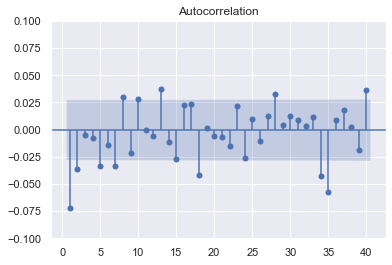

In [50]:
sgt.plot_acf(data.returns_spx[1:], lags=40, zero=False)
plt.ylim(-0.1, 0.1)
plt.show()

In [51]:
model_ret_ma_1 = ARIMA(data.returns_spx[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -8066.419
Date:                Mon, 15 Aug 2022   AIC                          16138.839
Time:                        18:51:02   BIC                          16158.402
Sample:                    01-10-1994   HQIC                         16145.694
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.924      0.054      -0.001       0.063
ma.L1         -0.0781      0.008     -9.247      0.000      -0.095      -0.062
sigma2         1.4562      0.013    112.935      0.000       1.431       1.481
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             14759.58
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_ret_ma_2 = ARIMA(data.returns_spx[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -8062.759
Date:                Mon, 15 Aug 2022   AIC                          16133.518
Time:                        18:51:03   BIC                          16159.603
Sample:                    01-10-1994   HQIC                         16142.659
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.972      0.049       0.000       0.062
ma.L1         -0.0759      0.008     -8.961      0.000      -0.093      -0.059
ma.L2         -0.0389      0.007     -5.644      0.000      -0.052      -0.025
sigma2         1.4541      0.013    107.753      0.000       1.428       1.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13824.74
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
llr(model_ret_ma_1, model_ret_ma_2)

0.007

In [54]:
model_ret_ma_7 = ARIMA(data.returns_spx[1:], order=(0,0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
results_ret_ma_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -8055.652
Date:                Mon, 15 Aug 2022   AIC                          16129.304
Time:                        18:51:07   BIC                          16187.995
Sample:                    01-10-1994   HQIC                         16149.870
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.015      2.114      0.034       0.002       0.060
ma.L1         -0.0754      0.009     -8.776      0.000      -0.092      -0.059
ma.L2         -0.0394      0.007     -5.647      0.000      -0.053      -0.026
ma.L3         -0.0045      0.009     -0.516      0.606      -0.022       0.013
ma.L4         -0.0112      0.008     -1.400      0.162      -0.027       0.004
ma.L5         -0.0342      0.007     -4.579      0.000      -0.049      -0.020
ma.L6         -0.0118      0.008     -1.535      0.125      -0.027       0.003
ma.L7         -0.0302      0.007     -4.063      0.000      -0.045      -0.016
sigma2         1.4500      0.014    106.357      0.000       1.423       1.477
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13453.86
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model_ret_ma_8 = ARIMA(data.returns_spx[1:], order=(0,0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -8053.403
Date:                Mon, 15 Aug 2022   AIC                          16126.805
Time:                        18:51:10   BIC                          16192.017
Sample:                    01-10-1994   HQIC                         16149.656
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.015      2.047      0.041       0.001       0.061
ma.L1         -0.0754      0.009     -8.748      0.000      -0.092      -0.058
ma.L2         -0.0416      0.007     -5.922      0.000      -0.055      -0.028
ma.L3         -0.0055      0.009     -0.625      0.532      -0.023       0.012
ma.L4         -0.0114      0.008     -1.419      0.156      -0.027       0.004
ma.L5         -0.0359      0.008     -4.793      0.000      -0.051      -0.021
ma.L6         -0.0121      0.008     -1.573      0.116      -0.027       0.003
ma.L7         -0.0311      0.008     -4.128      0.000      -0.046      -0.016
ma.L8          0.0293      0.008      3.599      0.000       0.013       0.045
sigma2         1.4487      0.014    103.996      0.000       1.421       1.476
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12977.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
llr(model_ret_ma_7, model_ret_ma_8)

0.034

In [57]:
data

,Market_Value,wn,rw,returns_spx
date,,,,
1994-01-07,469.900000,1209.215609,1122.139662,NaN
1994-01-10,475.270000,1611.048281,1080.347860,1.142796
1994-01-11,474.130000,1118.150575,1082.095245,-0.239864
1994-01-12,474.170000,1234.652011,1083.639265,0.008437
1994-01-13,472.470000,999.085906,1067.146255,-0.358521
...,...,...,...,...
2013-04-01,1562.173837,1150.647186,2263.675474,-0.446858
2013-04-02,1570.252238,884.268673,2225.000870,0.517126
2013-04-03,1553.686978,1211.113150,2190.787688,-1.054943


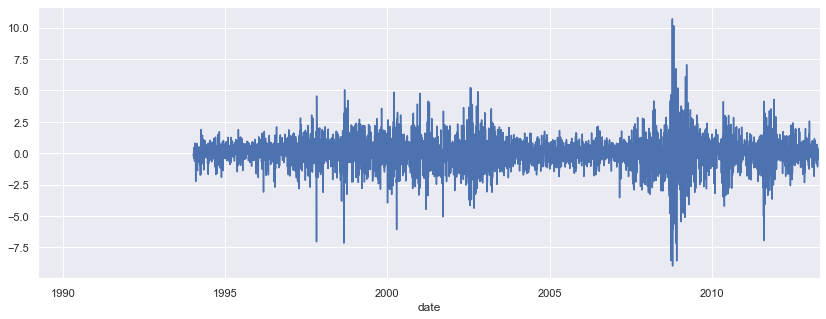

In [58]:
data['res_ret_ma_8'] = results_ret_ma_8.resid[1:]
data['res_ret_ma_8'].plot(figsize=(14,5))
plt.xlim(len(data.res_ret_ma_8), 11300)
plt.show()


In [59]:
round(data.res_ret_ma_8.mean(),3), round(data.res_ret_ma_8.std(),3), round(data.res_ret_ma_8.var(),3)

(-0.0, 1.204, 1.449)

In [60]:
sts.adfuller(data.res_ret_ma_8[2:])

(-70.85648751288372,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 16026.273202939366)

(-0.04, 0.04)

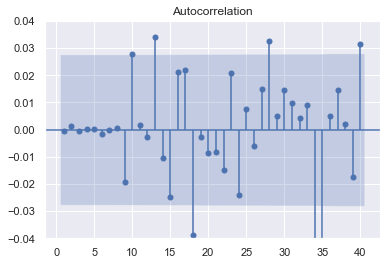

In [61]:
 sgt.plot_acf(data.res_ret_ma_8[2:], lags=40, zero=False)
plt.ylim(-0.04, 0.04)

### ARMA

In [62]:
model_ret_arma_1 = ARIMA(data.returns_spx[1:], order=(1,0,1))
results_ret_arma_1 = model_ret_arma_1.fit()
results_ret_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8060.603
Date:                Mon, 15 Aug 2022   AIC                          16129.205
Time:                        18:51:17   BIC                          16155.290
Sample:                    01-10-1994   HQIC                         16138.346
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.015      2.049      0.040       0.001       0.061
ar.L1          0.6108      0.053     11.457      0.000       0.506       0.715
ma.L1         -0.6815      0.048    -14.152      0.000      -0.776      -0.587
sigma2         1.4528      0.013    108.660      0.000       1.427       1.479
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):             13590.07
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
model_ret_ar_3_ma_2 = ARIMA(data.returns_spx[1:], order=(3,0,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            returns_spx   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -8060.158
Date:                Mon, 15 Aug 2022   AIC                          16134.315
Time:                        18:51:20   BIC                          16179.964
Sample:                    01-10-1994   HQIC                         16150.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.015      2.024      0.043       0.001       0.061
ar.L1          0.0070     54.296      0.000      1.000    -106.411     106.425
ar.L2          0.4698     36.722      0.013      0.990     -71.505      72.444
ar.L3          0.0121      0.994      0.012      0.990      -1.937       1.961
ma.L1         -0.0837     54.296     -0.002      0.999    -106.501     106.334
ma.L2         -0.5028     40.888     -0.012      0.990     -80.641      79.636
sigma2         1.4526      0.014    105.798      0.000       1.426       1.479
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13777.31
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA

In [64]:
model_ar_1_i_1_ma_1 = ARIMA(data.Market_Value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20072.331
Date:                Mon, 15 Aug 2022   AIC                          40150.663
Time:                        18:51:21   BIC                          40170.226
Sample:                    01-07-1994   HQIC                         40157.518
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6011      0.063      9.533      0.000       0.478       0.725
ma.L1         -0.6693      0.057    -11.723      0.000      -0.781      -0.557
sigma2       174.0008      1.764     98.631      0.000     170.543     177.458
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              7333.43
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

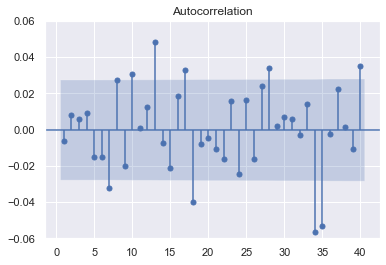

In [65]:
data['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid[1:]
sgt.plot_acf(data.res_ar_1_i_1_ma_1[1:], lags=40, zero=False)
plt.ylim(-0.06, 0.06)
plt.show()

In [66]:
results_ar_1_i_1_ma_1.llf, results_ret_arma_1.aic

(-20072.33127687232, 16129.20549404981)

In [67]:
model_ar_1_i_1_ma_2 = ARIMA(data.Market_Value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(data.Market_Value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit();

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [68]:
llr(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.97

In [69]:
llr(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF=2)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.672

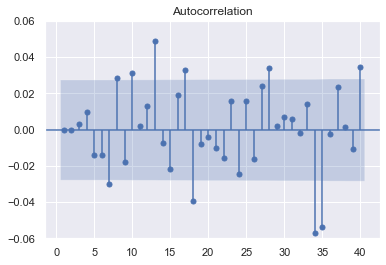

In [70]:
data['res_ar_1_i_1_ma_2'] = results_ar_1_i_1_ma_2.resid[1:]
sgt.plot_acf(data.res_ar_1_i_1_ma_2[1:], lags=40, zero=False)
plt.ylim(-0.06, 0.06)
plt.show()

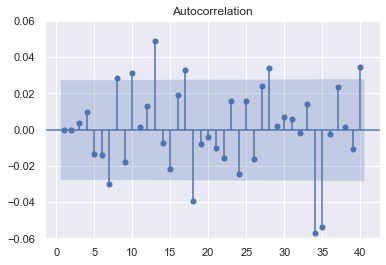

In [71]:
data['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid[1:]
sgt.plot_acf(data.res_ar_1_i_1_ma_3[1:], lags=40, zero=False)
plt.ylim(-0.06, 0.06)
plt.show()

In [72]:
model_ar_7_i_1_ma_7 = ARIMA(data.Market_Value, order=(7,1,7))
results_ar_7_i_1_ma_7 = model_ar_7_i_1_ma_7.fit()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
llr(model_ar_1_i_1_ma_1, model_ar_7_i_1_ma_7, DF=6)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.0

In [74]:
results_ar_7_i_1_ma_7.llf, results_ar_7_i_1_ma_7.aic

(-20059.300024903998, 40148.600049807996)

In [75]:
model_ar_6_i_1_ma_1 = ARIMA(data.Market_Value, order=(6,1,1))
results_ar_6_i_1_ma_1 = model_ar_6_i_1_ma_1.fit()

In [76]:
model_ar_5_i_1_ma_1 = ARIMA(data.Market_Value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()

In [77]:
model_ar_7_i_1_ma_1 = ARIMA(data.Market_Value, order=(7,1,1))
results_ar_7_i_1_ma_1 = model_ar_7_i_1_ma_1.fit()

In [78]:
results_ar_7_i_1_ma_1.llf, results_ar_7_i_1_ma_1.aic

(-20064.397163437512, 40146.794326875024)

In [79]:
llr(model_ar_7_i_1_ma_1, model_ar_7_i_1_ma_7, DF=8)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.252

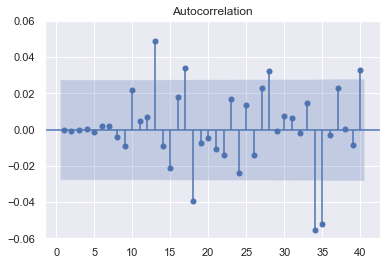

In [80]:
data['res_ar_7_i_1_ma_1'] = results_ar_7_i_1_ma_1.resid[1:]
sgt.plot_acf(data.res_ar_7_i_1_ma_1[1:], lags=40, zero=False)
plt.ylim(-0.06, 0.06)
plt.show()

### Business Case

In [81]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [82]:
raw_data = yfinance.download(tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  3 of 3 completed


In [83]:
data = raw_data.copy()

In [84]:
data.head()

PAH3.DE                          BMW.DE                      \
              Open High Low Close Volume      Open      High       Low   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN  9.353779  9.353779  9.333746   
1996-11-11     NaN  NaN NaN   NaN    NaN  9.343506  9.348643  9.288031   
1996-11-12     NaN  NaN NaN   NaN    NaN  9.328611  9.414392  9.293168   
1996-11-13     NaN  NaN NaN   NaN    NaN  9.422608  9.422608  9.343505   
1996-11-14     NaN  NaN NaN   NaN    NaN  9.351214  9.394361  9.313717   

                                VOW3.DE                        
               Close     Volume    Open High Low Close Volume  
Date                                                           
1996-11-08  9.333746   767000.0     NaN  NaN NaN   NaN    NaN  
1996-11-11  9.308577   260000.0     NaN  NaN NaN   NaN    NaN  
1996-11-12  9.378950  1066000.0     NaN  NaN NaN   NaN    NaN  
1996-11-13  9.364051   793000.0     NaN  NaN NaN   NaN    NaN  
1996-11-14  9.394361   351000.0     NaN  NaN NaN   NaN    NaN

In [100]:
# Starting Date
start_date = "2009-04-05" 

# First Official Announcement - 49.9%
ann_1 = "2009-12-09" 

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05" 

#Ending Date
end_date = "2014-01-01"

# Dieselgate
d_gate = '2015-09-20' 

In [86]:
data['vol'] = data['VOW3.DE'].Close
data['por'] = data['PAH3.DE'].Close
data['bmw'] = data['BMW.DE'].Close

In [87]:
data['ret_vol'] = data['vol'].pct_change().mul(100)
data['ret_por'] = data['por'].pct_change().mul(100)
data['ret_bmw'] = data['bmw'].pct_change().mul(100)

In [88]:
data['sqr_ret_vol'] = data['ret_vol'].pow(2)
data['sqr_ret_por'] = data['ret_por'].pow(2)
data['sqr_ret_bmw'] = data['ret_bmw'].pow(2)

In [89]:
data['q_vol'] = data['VOW3.DE'].Volume
data['q_por'] = data['PAH3.DE'].Volume
data['q_bmw'] = data['BMW.DE'].Volume

In [90]:
data.drop(['PAH3.DE', 'VOW3.DE', 'BMW.DE'], axis = 1, inplace = True)

In [91]:
data

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sqr_ret_vol,sqr_ret_por,sqr_ret_bmw,q_vol,q_por,q_bmw
,,,,,,,,,,,,
Date,,,,,,,,,,,,
1996-11-08,NaN,NaN,9.333746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767000.0
1996-11-11,NaN,NaN,9.308577,NaN,NaN,-0.269660,NaN,NaN,0.072716,NaN,NaN,260000.0
1996-11-12,NaN,NaN,9.378950,NaN,NaN,0.756007,NaN,NaN,0.571547,NaN,NaN,1066000.0
1996-11-13,NaN,NaN,9.364051,NaN,NaN,-0.158858,NaN,NaN,0.025236,NaN,NaN,793000.0
1996-11-14,NaN,NaN,9.394361,NaN,NaN,0.323691,NaN,NaN,0.104776,NaN,NaN,351000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-09,142.860001,71.419998,77.089996,-1.949208,-2.324951,-1.293217,3.799413,5.405399,1.672409,614326.0,436336.0,1044979.0
2022-08-10,145.919998,72.339996,77.989998,2.141955,1.288152,1.167469,4.587973,1.659336,1.362983,694655.0,698547.0,932542.0


In [92]:
df = data.asfreq('b', method = 'bfill')


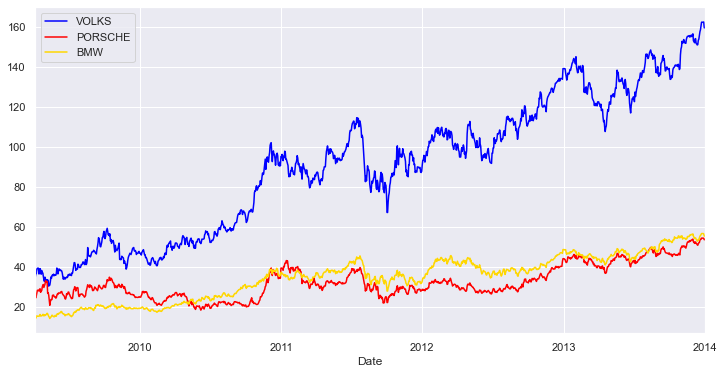

In [98]:
from turtle import color


df['vol'][start_date:end_date].plot(figsize=(12,6), color='blue', label='VOLKS')
df['por'][start_date:end_date].plot(figsize=(12,6), color='red', label='PORSCHE')
df['bmw'][start_date:end_date].plot(figsize=(12,6), color='gold', label='BMW')
plt.legend()
plt.show()

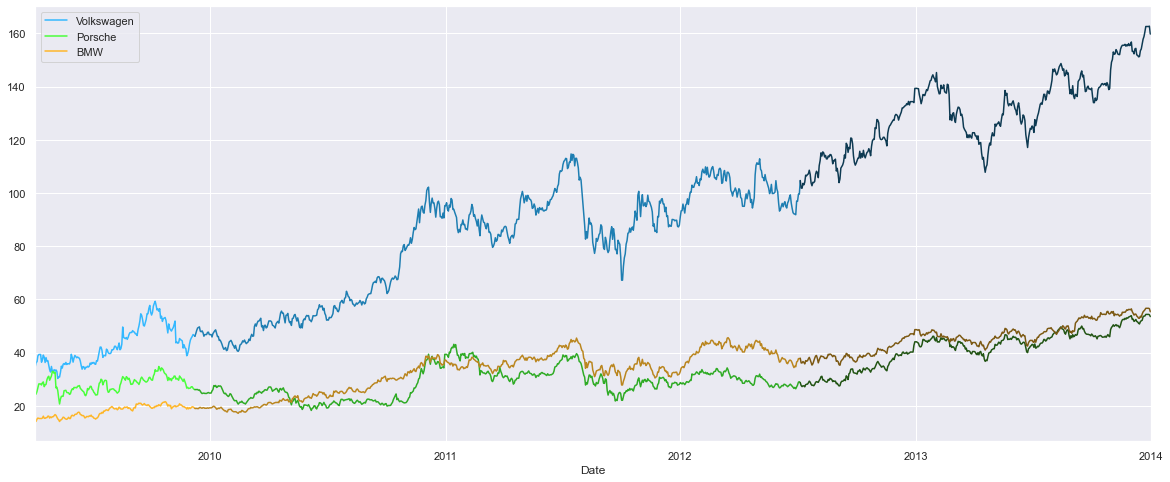

In [94]:
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

In [96]:
print(str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print(str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print(str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

0.8359546946224672
0.9799378249220592
0.8052157731107117


In [103]:
mod_pr_pre_vol = auto_arima(df['vol'][start_date:ann_1], exogenous=df[['por','bmw']][start_date:ann_1], m=5, max_p=5, max_q=5)
mod_pr_btn_vol = auto_arima(df['vol'][ann_1:ann_2], exogenous=df[['por','bmw']][ann_1:ann_2], m=5, max_p=5, max_q=5)
mod_pd_podt_vol = auto_arima(df['vol'][ann_2:end_date], exogenous=df[['por','bmw']][ann_2:end_date], m=5, max_p=5, max_q=5)

In [106]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -313.553
Date:                Mon, 15 Aug 2022   AIC                            637.106
Time:                        19:18:10   BIC                            653.015
Sample:                    04-06-2009   HQIC                           643.557
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6858      0.424      1.618      0.106      -0.145       1.517
por            0.3925      0.094      4.169      0.000       0.208       0.577
bmw            0.7060      0.335      2.107      0.035       0.049       1.363
ar.L1          0.9633      0.020     48.670      0.000       0.925       1.002
sigma2         1.9550      0.133     14.718      0.000       1.695       2.215
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               166.03
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1044.484
Date:                Mon, 15 Aug 2022   AIC                           2094.968
Time:                        19:18:28   BIC                           2108.494
Sample:                    12-09-2009   HQIC                          2100.207
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7760      0.060     12.842      0.000       0.658       0.894
bmw            1.5801      0.074     21.269      0.000       1.435       1.726
sigma2         1.3170      0.054     24.532      0.000       1.212       1.422
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):               112.42
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -313.553
Date:                Mon, 15 Aug 2022   AIC                            637.106
Time:                        19:18:56   BIC                            653.015
Sample:                    04-06-2009   HQIC                           643.557
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6858      0.424      1.618      0.106      -0.145       1.517
por            0.3925      0.094      4.169      0.000       0.208       0.577
bmw            0.7060      0.335      2.107      0.035       0.049       1.363
ar.L1          0.9633      0.020     48.670      0.000       0.925       1.002
sigma2         1.9550      0.133     14.718      0.000       1.695       2.215
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               166.03
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
mod_pr_pre_vol_ne = auto_arima(df['vol'][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')
df_ar_pred_pr = pd.DataFrame(mod_pr_pre_vol_ne.predict(n_periods=len(df['vol'][ann_1:ann_2])), index=df[ann_1:ann_2].index)

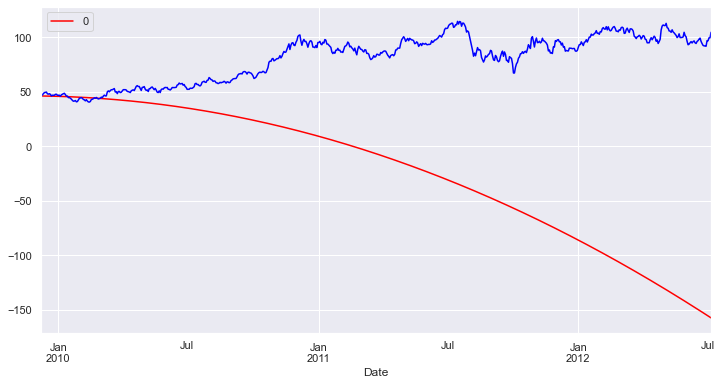

In [125]:
df_ar_pred_pr.plot(figsize=(12,6), color='red', label='VOLKS')
df.vol[ann_1:ann_2].plot(color='blue', label='PORSCHE')
plt.show()

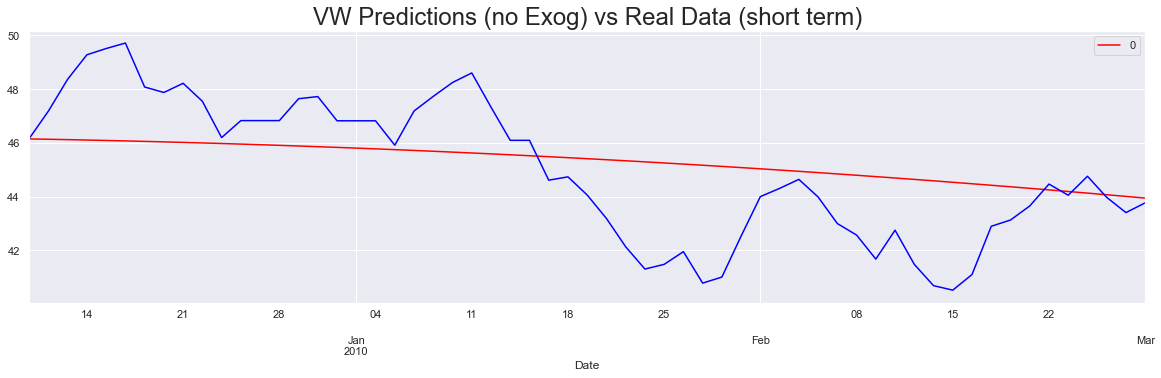

In [127]:
df_ar_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

### Volatility

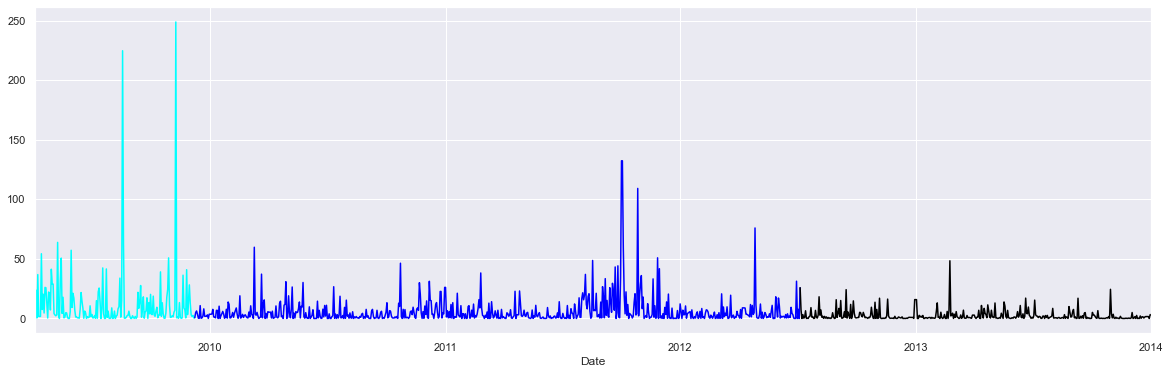

In [134]:
df.sqr_ret_vol[start_date:ann_1].plot(figsize=(20,6), color='cyan')
df.sqr_ret_vol[ann_1:ann_2].plot(color='blue')
df.sqr_ret_vol[ann_2:end_date].plot(color='black')
plt.show()